## Problem Definition

This project addresses the problem of disambiguation for people contributing to various scientific events. Say, we are looking at all the contributions by the same scientist. The same scientist may have slight variations in her name, focus area or workplace locations.

Now, how do we say two contributions belong to the same person? 

We use machine learning techniques to solve this problem. It turns out to be a binary classification problem where  contributions either match or don't match (1 or 0).

## Data Preprocessing

We apply the following modifications to the dataset:
- Adding a person_id column
- Summing up the coordinates for workplace locations
- Filling NaN values
- Encoding categorical data

In [129]:
import pandas as pd
import csv
import warnings
warnings.filterwarnings('ignore')
import pprint

df = pd.read_json ('data/data.json')
df.to_csv ('data/data.csv', index = None)

df = pd.read_json ('data/ground-truth.json')
df.to_csv ('data/ground-truth.csv', index = None)

df = pd.read_json ('data/persons.json')
df.to_csv ('data/persons.csv', index = None)

csv_data= pd.read_csv('data/data.csv') 

csv_data.head()

,index,contribution_id,first_name,middle_name,last_name,full_name,workplace,workplace_locations,focus_areas,orgs,gpes
0,0,57cd7e10fb02f601005aa890,H.,L. A.,Janssen,NaN,netherlands,"[[52.2379891, 5.5346073816], [51.44520085, 4.9...","['Hepatology General', 'Topic: Hepatology', 'V...",[],[]
1,1,57cdbdcc66b66a0100d8253d,H,NaN,Janssen,NaN,canada,"[[61.0666922, -107.9917071], [45.3160454, -75....","['Topic: Gastroenterology', 'Therapy plain onl...",[],['Canada']
2,2,57cdf771fed32501000a29c0,H.,L. A.,Janssen,NaN,netherlands,"[[52.2379891, 5.5346073816], [51.44520085, 4.9...","['Topic: Infections', 'Viral Infections', 'Hep...",[],[]
3,3,57cfca358f10260100f5f3f3,Eric,P.,Winer,NaN,NaN,[],"['Topic: Solid Tumors', 'Cancer Radiotherapy',...",[],[]
4,4,57cfcdb38f10260100f5f415,Eric,P.,Winer,NaN,NaN,[],"['Metastases General', 'Metastases / Metastati...",[],[]


In [130]:

import string
printable = set(string.printable)
from sklearn.preprocessing import OrdinalEncoder
import numpy as np


data_items=[]
with open( 'data/data.csv', 'r') as f:
    
    reader = csv.reader(f)
    next(reader, None) 
    for row in reader :  
       data_items.append(row)
     
    
person_id={}
with open( 'data/ground-truth.csv', 'r') as f:
    
    reader = csv.reader(f)
    next(reader, None) 
    for row in reader:
        person_id[row[0]]=row[1]
        
        
main_data=[]      
        
for d in data_items:

    new_raw=[]
    new_raw.append( d[1])
    new_raw.append(person_id[d[1]] )
    d_2= ''.join(filter(lambda x: x in printable, d[2])).replace("/", " ")
    d_3= ''.join(filter(lambda x: x in printable, d[3])).replace("/", " ")
    d_4= ''.join(filter(lambda x: x in printable, d[4])).replace("/", " ")
    d_5= ''.join(filter(lambda x: x in printable, d[5])).replace("/", " ")
    d_6= ''.join(filter(lambda x: x in printable, d[6])).replace("/", " ")

 
    new_raw.append(d_2)
    new_raw.append(d_3)
    new_raw.append(d_4)
    new_raw.append(d_5)
    new_raw.append(d_6)
    
    
   
    if "[]" in d[7]:
            loc_values=0
        
    else: 
            
        loc_values=0  
            
        for loc in d[7].split(","):
        
             loc=loc.strip('][')
             loc=loc.replace("[", "")
             loc=loc.replace("]", "")
             loc=loc.replace(" ", "")
             loc=loc.replace("]]", "")
             loc=loc.replace("[[", "")
             locs= float(loc)
             #print('loc, loc_values', locs, loc_values)
             loc_values+=locs
             
    new_raw.append(loc_values)  
            
            
            
    spl= d[8].split(",")
    for s in spl:
       
        s=s.replace(" / ", "")
        s=s.replace(" & ", "")
        s=s.replace("/", " ")
        s=s.replace("-", "")
        s=s.replace("Topic: ", "")
        s=s.replace("[All]", "")
        strp= s.strip('][')
        
        #print(strp)
    new_raw.append(strp )   

    if "[]" in d[9]:
        orgs=" "
        
    else:
        orgs= ''.join(filter(lambda x: x in printable, d[9]))
    
        orgs=orgs.strip('][')
     
        orgs=orgs.replace(",", "")
        orgs=orgs.replace("/", " ")
        orgs=orgs.replace("-", "")
        orgs=orgs.replace(" & ", "")
        
        
    new_raw.append(orgs)
        
     
    if "[]" in d[10]: # and any(char.isdigit() for char in d[10]):
        gpes=" "
        
    else:
        
        gpes= d[10]
        gpes= ''.join(filter(lambda x: x in printable, gpes))
     
        gpes=gpes.strip('][')
     
        gpes==gpes.replace(",", "")
        gpes==gpes.replace("/", " ")
        gpes==gpes.replace("-", "")
        gpes==gpes.replace(" & ", "")
        gpes==gpes.replace(",", "")
        
    new_raw.append(gpes)
    
        
    main_data.append(new_raw)
    
    if  len(new_raw)!=11:
        print(len(new_raw))
    
print('numeber of data points in main_data:',len(main_data))    
print('numeber of data points in data_items:',len(data_items)) 


header=['contribution_id', 'person_id','first_name', 'middle_name','last_name','full_name','workplace',
        'workplace_locations','focus_areas','org', 'gpes']

with open('data/main_data.csv', 'w', newline='') as f:
    
    writer = csv.writer(f)
    writer.writerow( header)
    
    for item in main_data:
        writer.writerow(item)

print("written in csv file...")
    

numeber of data points in main_data: 5087
numeber of data points in data_items: 5087
written in csv file...


In [131]:
processed_data= pd.read_csv('data/main_data.csv') 
processed_data.head()

,contribution_id,person_id,first_name,middle_name,last_name,full_name,workplace,workplace_locations,focus_areas,org,gpes
0,57cd7e10fb02f601005aa890,1300152178112,H.,L. A.,Janssen,NaN,netherlands,1128.585126,'Viral Hepatitis General',,
1,57cdbdcc66b66a0100d8253d,1300152178112,H,NaN,Janssen,NaN,canada,-724.105475,'Hepatitis B',,'Canada'
2,57cdf771fed32501000a29c0,1300152178112,H.,L. A.,Janssen,NaN,netherlands,1128.585126,'Therapy plain only',,
3,57cfca358f10260100f5f3f3,10004446,Eric,P.,Winer,NaN,NaN,0.000000,'MetastasesMetastatic Cancers',,
4,57cfcdb38f10260100f5f415,10004446,Eric,P.,Winer,NaN,NaN,0.000000,'Solid Tumors plus HematoOnc ',,


<AxesSubplot:>

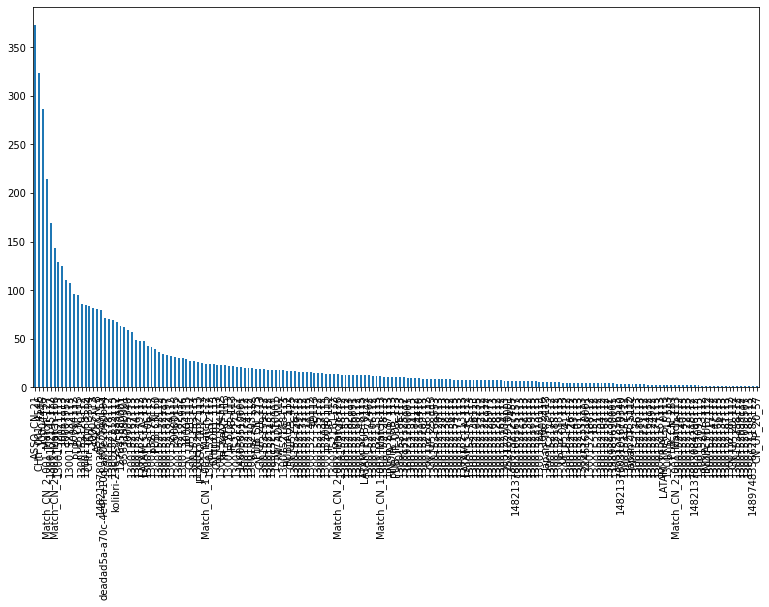

In [227]:
processed_data['person_id'].value_counts().plot(kind='bar', figsize=(13, 7))

The distribution chart shows the number of contributions per person. The more contributions, the more accurate profiling. It shows we have enough contributions for most people to build the training data.

In [163]:

ord_enc = OrdinalEncoder()
processed_data["first_name"].fillna('0', inplace=True)
processed_data["middle_name"].fillna('0', inplace=True)
processed_data["last_name"].fillna('0', inplace=True)
processed_data["full_name"].fillna('0', inplace=True)
processed_data["workplace"].fillna('0', inplace=True)
processed_data["focus_areas"].fillna('0', inplace=True)
processed_data["org"].fillna('0', inplace=True)
processed_data["gpes"].fillna('0', inplace=True)

processed_data["first_name"]= ord_enc .fit_transform(processed_data[["first_name"]])
processed_data["middle_name"] = ord_enc .fit_transform(processed_data[["middle_name"]])
processed_data["last_name"] = ord_enc .fit_transform(processed_data[["last_name"]])
processed_data["full_name"] = ord_enc .fit_transform(processed_data[["full_name"]])
processed_data["workplace"] = ord_enc .fit_transform(processed_data[["workplace"]])
processed_data["focus_areas"] = ord_enc .fit_transform(processed_data[["focus_areas"]])
processed_data["org"] = ord_enc .fit_transform(processed_data[["org"]])
processed_data["gpes"] = ord_enc .fit_transform(processed_data[["gpes"]])

print(processed_data.dtypes)

contribution_id         object
person_id               object
first_name             float64
middle_name            float64
last_name              float64
full_name              float64
workplace              float64
workplace_locations    float64
focus_areas            float64
org                    float64
gpes                   float64
dtype: object


## Training Data Preparation

First, we find the list of contributions for each unique person_id. Then,  through a for loop we sample a pair of contributions which belong to the same person and give it label 1. To gather negative class pairs, for each of given contribution, we randomly sample another contribution which does not belong to the same person. In summary:
- If (cont1, cont2) have the same person_id  ====>  match label=1
- If (cont1, cont2) do not have the same person_id  ====>  match label=0

In [215]:
from collections import defaultdict
import random

person_cont=defaultdict(list)

for u,v in zip(processed_data["contribution_id"] , processed_data["person_id"]  ):
    
    person_cont[v].append(u)
    
    
data_labels=[]    

for i in person_cont: 
    
    #print('person_id:', i,"number of contributions ===============> ",len(person_cont[i]))
    
    for j in range(len(person_cont[i])-1):
        
       #print(person_cont[i][j], person_cont[i][j+1], "1" )
       data_labels.append((person_cont[i][j], person_cont[i][j+1], "1" ))
        
       rand_cont= random.choice(processed_data["contribution_id"])
    
       if rand_cont not in person_cont[i]:
      
            data_labels.append((person_cont[i][j], rand_cont, "0" ))
            #print(person_cont[i][j], rand_cont, "0")
    
print("How to label the data: ",'\n')    
print( "     contribution 1               contribution 2          label      person_id 1      person_id 2")

print('--------------------------------------------------------------------------------------------------')
for cont1, cont2, label in data_labels[10:15]:
     
    print(cont1, '    ',cont2,   '    ',  label, '    ', person_id[cont1], '   ', person_id[cont2] )

How to label the data:  

     contribution 1               contribution 2          label      person_id 1      person_id 2
--------------------------------------------------------------------------------------------------
57d94636daafc31b10e60960      57d94636daafc31b10e60d63      1      1300152178112     1300152178112
57d94636daafc31b10e60960      5a53e7af9b79b700015012ec      0      1300152178112     1300152112113
57d94636daafc31b10e60d63      57d94636daafc31b10e60e3b      1      1300152178112     1300152178112
57d94636daafc31b10e60d63      5ad61898dab14c0001db3feb      0      1300152178112     1300152182797
57d94636daafc31b10e60e3b      57d94636daafc31b10e60e67      1      1300152178112     1300152178112


In [216]:
contribution_data=defaultdict(list)

for index, row in processed_data.iterrows():
     contribution_data[row["contribution_id"]].append(row["first_name"])
     contribution_data[row["contribution_id"]].append(row["middle_name"])
     contribution_data[row["contribution_id"]].append(row["last_name"])
     contribution_data[row["contribution_id"]].append(row["full_name"])
     contribution_data[row["contribution_id"]].append(row["workplace"])
     contribution_data[row["contribution_id"]].append(row["workplace_locations"])
     contribution_data[row["contribution_id"]].append(row["focus_areas"])
     contribution_data[row["contribution_id"]].append(row["org"])
     contribution_data[row["contribution_id"]].append(row["gpes"])
    
    
for  cont_id in  processed_data["contribution_id"][0:5]:  
 
    print('contribution id:', cont_id,contribution_data[cont_id])
    

contribution id: 57cd7e10fb02f601005aa890 [64.0, 38.0, 70.0, 3.0, 567.0, 1128.5851262761, 581.0, 0.0, 0.0]
contribution id: 57cdbdcc66b66a0100d8253d [62.0, 0.0, 70.0, 3.0, 100.0, -724.1054750544, 255.0, 0.0, 39.0]
contribution id: 57cdf771fed32501000a29c0 [64.0, 38.0, 70.0, 3.0, 567.0, 1128.5851262761, 551.0, 0.0, 0.0]
contribution id: 57cfca358f10260100f5f3f3 [50.0, 46.0, 169.0, 3.0, 18.0, 0.0, 348.0, 0.0, 0.0]
contribution id: 57cfcdb38f10260100f5f415 [50.0, 46.0, 169.0, 3.0, 18.0, 0.0, 526.0, 0.0, 0.0]


Here we concatenate features from contribution 1 and contribution 2 to build the training matrix.

In [224]:
X=[]
y=[]

for cont1, cont2, label in data_labels:

    X.append(contribution_data[cont1]+contribution_data[cont2])
    y.append( label)
    
    #print( cont1, cont2, label)
    #print( contribution_data[cont1])
    #print( contribution_data[cont2])
    #print(label)
    
count_positive = y.count('1')
count_negative = y.count('0')

print( 'check label balance: postive',count_positive ,'negative',count_negative)

X=np.array(X)
y=np.array(y)
  
print('X shape:', X.shape )  

check label balance: postive 4900 negative 4781
X shape: (9681, 18)


## Classification
we examine different classifiers to quickly flush out what works well and what doesn’t:
- Dummy classifer (as baseline)
- Support Vector Machine(SVM)
- Linear Discriminant Analysis(LDA)
- Logistic Regression (LR)
- Neural Networks (NN)
- k-Nearest Neighbors(KNN)
- Random Forest (RF)
- Decision Tress (DT)
- Extra Trees Classifier(ET)
- Bagging Classifier(BAG)

In [241]:
import scipy.stats as stats
from numpy import median
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

def evaluate_model(X, y, model):
    
   cval = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
   acc_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cval, n_jobs=-1)
   f_scores= cross_val_score(model, X, y, scoring='f1_micro', cv=cval, n_jobs=-1)

   return acc_scores,f_scores

def clf_models():
    models, names = list(), list()
    
    models.append(DummyClassifier(strategy='uniform'))
    names.append('DuM')
    
    models.append(LinearSVC())
    names.append('SVM')
    
    
    models.append(LogisticRegression(solver='lbfgs'))
    names.append('LR ')
    
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    
    models.append(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(9, 3), random_state=42))
    names.append('NN ')
    
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    models.append(DecisionTreeClassifier())
    names.append('DT ')
    
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET ')
    
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF ')
    
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')
    return models, names

models, names = clf_models()

plt_scores=[]

for i in range(len(models)):
   steps = [('o', SMOTE(k_neighbors=2)), ('m', models[i])]
   pipeline = Pipeline(steps=steps)
   acc_scores ,f_scores = evaluate_model(X ,y, pipeline)
   plt_scores.append(acc_scores)
   print('====> %s    accuracy: %.4f (std %.4f)     F1: %.4f (std %.4f)' 
         % (names[i], mean(acc_scores), std(acc_scores), mean(f_scores), std(f_scores)))


====> DuM    accuracy: 0.5005 (std 0.0112)     F1: 0.5038 (std 0.0073)
====> SVM    accuracy: 0.4934 (std 0.0140)     F1: 0.5053 (std 0.0221)
====> LR     accuracy: 0.4965 (std 0.0115)     F1: 0.4962 (std 0.0114)
====> LDA    accuracy: 0.5020 (std 0.0163)     F1: 0.4987 (std 0.0139)
====> NN     accuracy: 0.5874 (std 0.0366)     F1: 0.5774 (std 0.0320)
====> KNN    accuracy: 0.7553 (std 0.0069)     F1: 0.7549 (std 0.0071)
====> DT     accuracy: 0.8454 (std 0.0196)     F1: 0.8509 (std 0.0148)
====> ET     accuracy: 0.8986 (std 0.0052)     F1: 0.8989 (std 0.0051)
====> RF     accuracy: 0.9051 (std 0.0047)     F1: 0.9045 (std 0.0050)
====> BAG    accuracy: 0.9153 (std 0.0050)     F1: 0.9158 (std 0.0052)


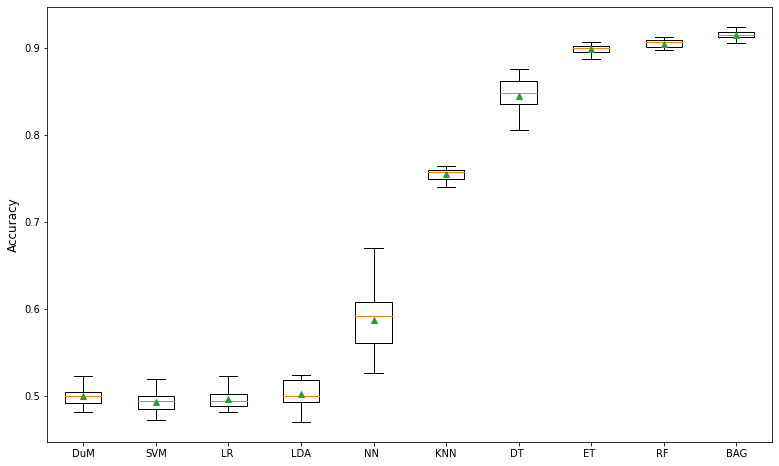

In [243]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(13, 8)
plt.ylabel('Accuracy', fontsize=12)
plt.boxplot(plt_scores, labels=names, showmeans=True)
plt.show()

## Evaluation

We have tried multiple classifiers. The Dummy classifier presents the baseline of our prediction through a random guess. The performance of each method is measured by accuracy and F1 score as it only returns higher values if both  Precision and Recall are high. We report the results after 5-fold cross validation along with standard deviation (std) proportional to the mean.

Looking at the detail presented in the box chart, the most successful prediction achieved by Bagging classifier with accuracy= 0.9153 and std of 0.0050 (quite small).
The Bagging classifier fits multiple base classifiers
and aggregate their individual predictions (either by voting or by averaging) to form a final prediction.
There exists a tight competition between Extra Trees (ET) and Random Forest (RF) Classifier. ET follows ensemble learning which aggregates the results of multiple de-correlated decision trees gathered in a forest to compute the final output. Conceptually, ET is very similar to a Random Forest but only differs in the manner of construction of the decision trees. The "Random" in RF means using a random subset of the dataset, but ET instead choose the best possible threshold for each tree at each node. Overall, their current performance is very close, however, ET is computationally faster. 

Although SVM and Logistic Regression are widely used algorithms, they both fail on this dataset (worse than Dummy). Neural networks achieved a great success in last decade, however on this particular dataset the feedforward network showed a poor performance using the implementation from sklearn.

We conclude ensemble learning methods which aggregate multiple classifiers are well-suited for this task and data, however they are usually time-consuming compared to a single SVM. A possible alternative solution is back to data preprocessing where location coordinates can be averaged instead of summation or encoding categorical data via one-hot encoding. It might improve SVM or LR performance after further data modication.

To scale up the computation for millions of data items, we can use PySpark.
PySpark is a powerful open source engine that provides interactive processing, in-memory processing as well as batch processing with high speed and ease of use.  The ML library of PySpark contains most conventional classification and clustering algorithms located in pyspark.ml.
